In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree

## <a name="dataset_description"></a>Iris Dataset Description:

The iris dataset describes iris flowers. 
The explaining features are:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm   

For the sake of demonstration I've added some noise the the original explaining variables

There are 3 different iris species: Setosa, Versicolor and Verginica.

In [11]:
iris = pd.read_csv('Data/iris.csv')
print(iris.shape)
print(iris.columns.values)

iris_X = iris.drop(['Species'],axis = 1)
iris_Y = iris.Species

# Add noisy features to make the problem harder
noise = np.random.normal(0,1,iris_X.shape)
#print(noise)

iris_with_noise_X = iris_X + noise
iris_with_noise = pd.concat([iris_with_noise_X, iris_Y], axis=1)
iris_with_noise.head()

iris_with_noise.head(10)

(150, 5)
['Sepal.Length' 'Sepal.Width' 'Petal.Length' 'Petal.Width' 'Species']


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.838774,3.150869,2.552947,-0.138983,setosa
1,5.633302,4.063206,0.912914,1.918582,setosa
2,4.829249,4.472595,0.812740,0.404875,setosa
3,4.773102,3.382598,2.729648,0.484304,setosa
4,3.310578,4.992468,0.893592,-0.006297,setosa
5,4.387745,4.395927,-0.516972,0.200262,setosa
6,5.412433,3.067126,-0.670316,0.332798,setosa
7,5.739549,2.979523,1.860401,0.163752,setosa
8,4.351120,4.513765,-0.082217,-1.730617,setosa
9,5.202007,2.511745,2.091930,0.612450,setosa


## <a name="cross_validation"></a>Cross Validation

Using KFold to create N shuffeled folds

In [12]:
k_folds=10

kf = KFold(n_splits=k_folds,shuffle=True) 
for train_index, test_index in kf.split(iris_X,iris_Y):
    print("Test indices:", test_index)

Test indices: [  3  22  31  36  38  40  69  84  85  94  96 112 122 123 147]
Test indices: [  2   5   9  15  18  20  21  48  64  80  97 100 120 121 135]
Test indices: [ 19  32  44  49  58  59  66  76  81  82  93 119 124 126 138]
Test indices: [  8  33  54  63  79  87  90  91 106 110 116 118 129 141 143]
Test indices: [  0  23  41  45  52  57  70  71  75  83  86 104 125 140 146]
Test indices: [ 12  17  39  42  60  68  74  99 109 115 132 134 144 145 149]
Test indices: [  7  16  24  29  47  51  56  61  62  67  73 105 117 128 142]
Test indices: [  4  10  11  25  28  35  37  55  72  77  92 111 113 114 131]
Test indices: [  1   6  26  34  43  46  50  53  89  98 101 108 133 136 139]
Test indices: [ 13  14  27  30  65  78  88  95 102 103 107 127 130 137 148]


## Evaluating classifier

Building a classifier using specific strategy (specific learning method and specific hyperparams)

In [17]:
clf_option_1 = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", min_samples_leaf=10, max_depth=4) # using default parameters
scores_option_1 = cross_val_score(clf_option_1, iris_with_noise_X, iris_Y, cv=kf, scoring='accuracy')

In [15]:
clf_option_2 = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", min_samples_leaf=1, max_depth=10) # using default parameters
scores_option_2 = cross_val_score(clf_option_2, iris_with_noise_X, iris_Y, cv=kf, scoring='accuracy')

visualizing the kfold scores variance

Strategy 1: Accuracy: 0.78 (+/- 0.27)
[0.53333333 0.73333333 0.73333333 0.93333333 1.         0.6
 0.86666667 0.8        0.8        0.8       ]


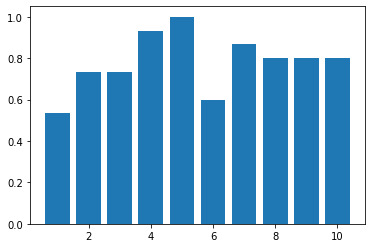

Strategy 2: Accuracy: 0.73 (+/- 0.23)
[0.66666667 0.86666667 0.66666667 0.6        0.8        0.86666667
 0.66666667 0.8        0.86666667 0.53333333]


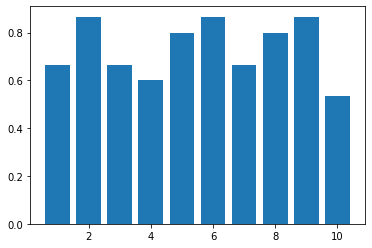

In [23]:
print("Strategy 1: Accuracy: %0.2f (+/- %0.2f)" % (scores_option_1.mean(), scores_option_1.std() * 2))
print(scores_option_1)
plt.bar(list(range(1, 11)), scores_option_1)
plt.show()

print("Strategy 2: Accuracy: %0.2f (+/- %0.2f)" % (scores_option_2.mean(), scores_option_2.std() * 2))
print(scores_option_2)
plt.bar(list(range(1, 11)), scores_option_2)
plt.show()